### In this notebook, we use the model module created for this project to generate and evaluate baseline sklearn model predictions. We will then select, tune, and stack models to achieve higher performance.

In [1]:
import pickle as pkl
from module3_scripts.model import Model, Ensemble

In [2]:
#import our df_preprocessed object created in the pre-processing notebook
df_preprocessed = pkl.load(open("pkl/df_preprocessed.p", "rb"))

In [3]:
#set variables for predictor training and test sets
X_train = df_preprocessed.X_train
X_test = df_preprocessed.X_test
y_train = df_preprocessed.y_train
y_test = df_preprocessed.y_test

**Note*** 
When evaluating model performance, on top of looking at metrics such as AUC and accuracy scores, let’s add one additional consideration by referring to the confusion matrices. It is expected that when data points lie on the border between classes, i.e. a company is on the border between medium and high risk, or medium and low risk, the model can get this classification wrong. However, it should be rare that the model makes a prediction of a class, but the actual class is on the opposite end of the spectrum, i.e. the model predicts a company’s credit as low risk, when it is actually high risk, or vice versa. We’ll call this kind of error the **_unacceptable error_**, and keep this in mind when performing evaluations. The unacceptable error can be calculated by adding the number of class “low” predictions that were actually class “high”, and vice versa, and dividing that by the total number of items in the test set. On the confusion matrices, these errors can be found on the top right and bottom left corners. 

Instantiating DummyClassifier...

Instantiating LogisticRegression...

Instantiating KNN...

Instantiating DecisionTree...

Instantiating Bagging...

Instantiating RandomForest...

Instantiating AdaBoost...

Instantiating GradientBoosting...

Instantiating XGBoost...

Static Params: {
    "verbosity": [
        0
    ]
}

Instantiating GaussianNB...

Instantiating SVM...

Static Params: {
    "probability": [
        true
    ]
}

Fitting and predicting target class with DummyClassifier...
Fitting and predicting target class with LogisticRegression...
Fitting and predicting target class with KNN...
Fitting and predicting target class with DecisionTree...
Fitting and predicting target class with Bagging...
Fitting and predicting target class with RandomForest...
Fitting and predicting target class with AdaBoost...
Fitting and predicting target class with GradientBoosting...
Fitting and predicting target class with XGBoost...
Fitting and predicting target class with GaussianNB...
Fitting

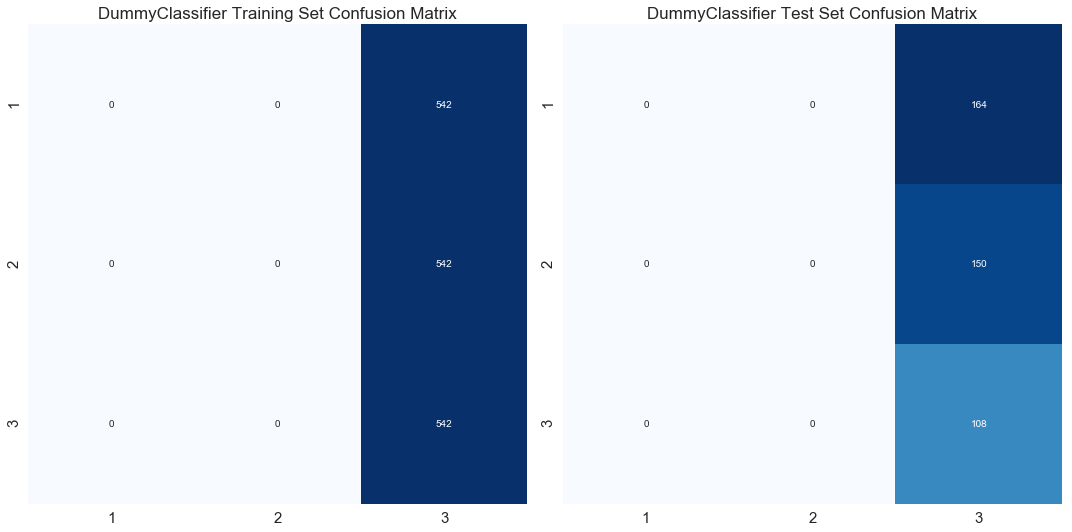

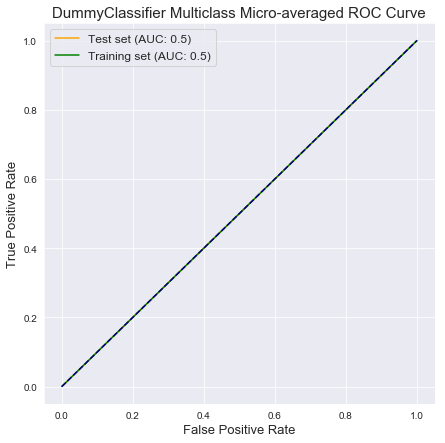

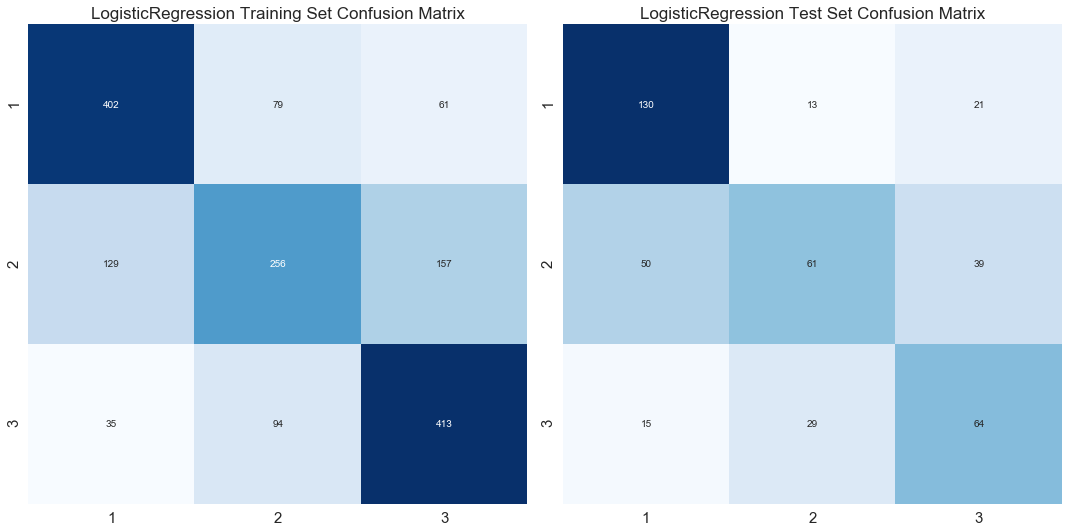

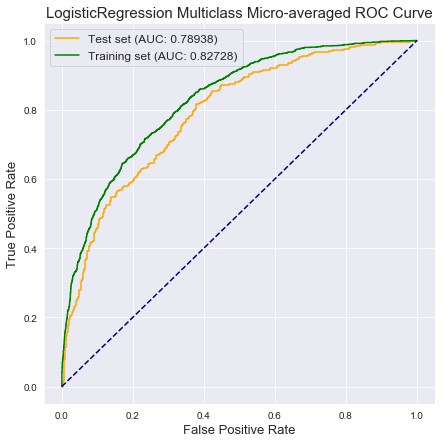

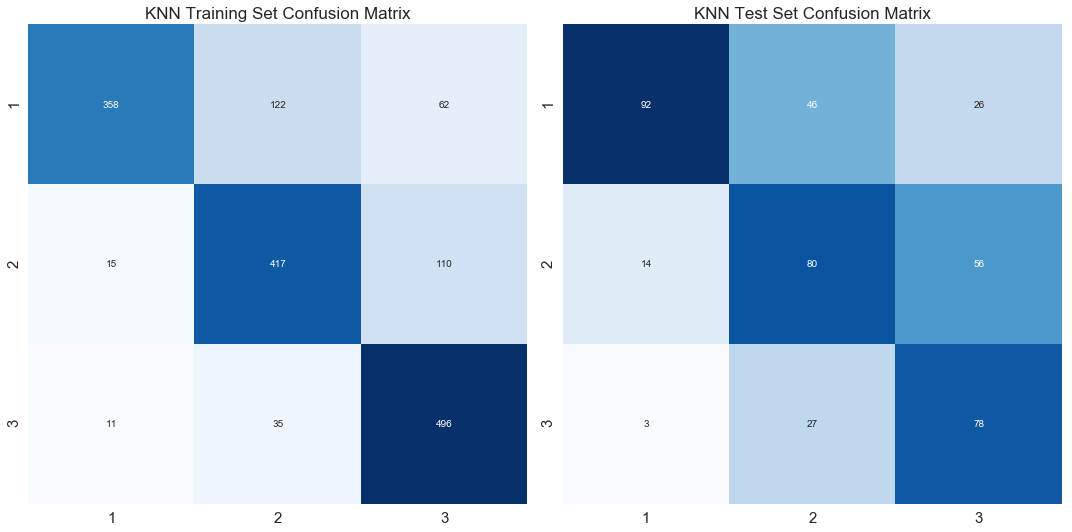

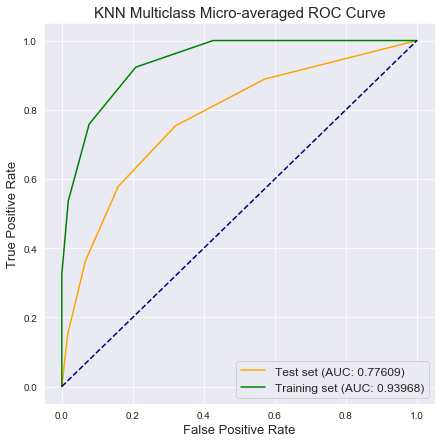

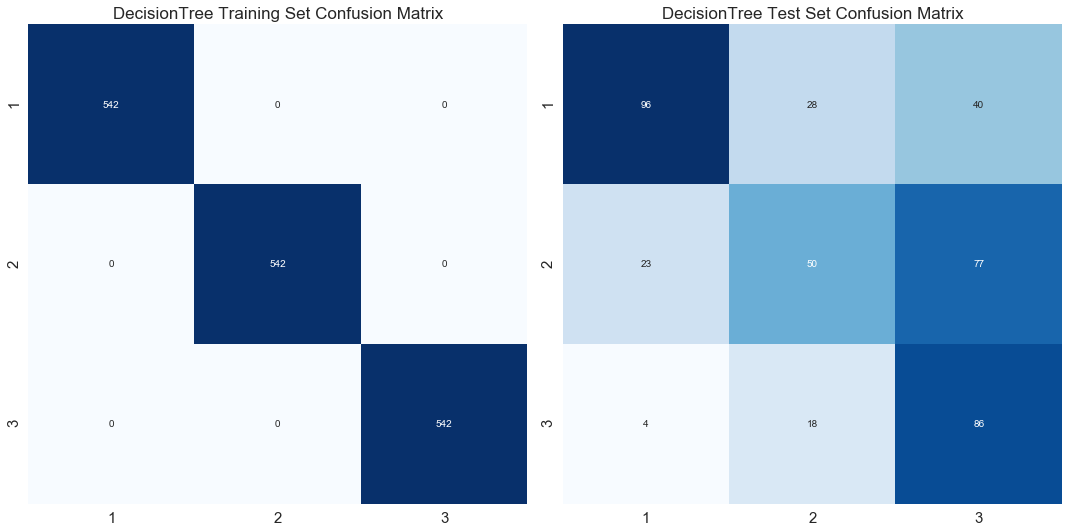

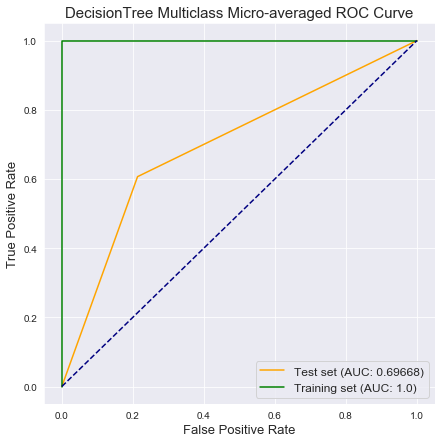

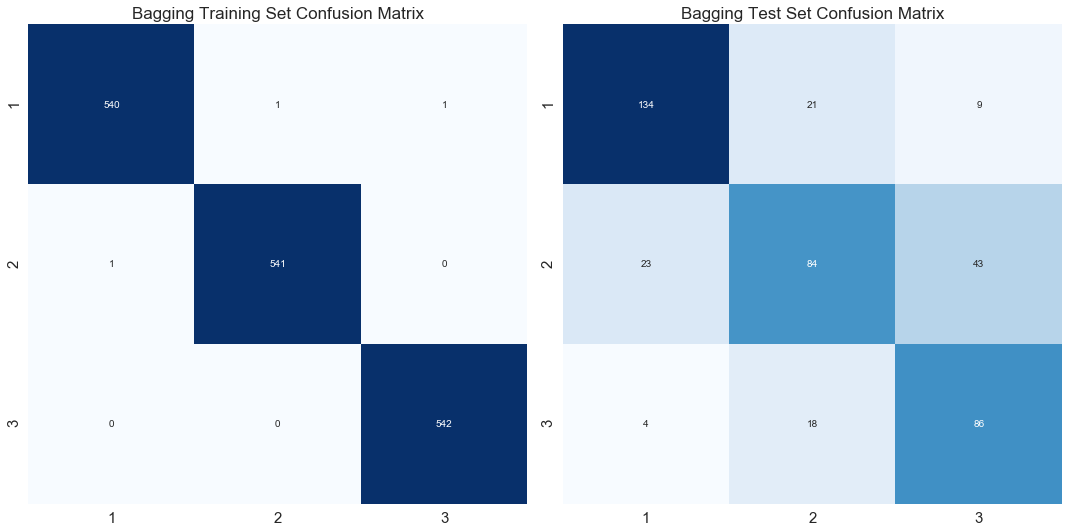

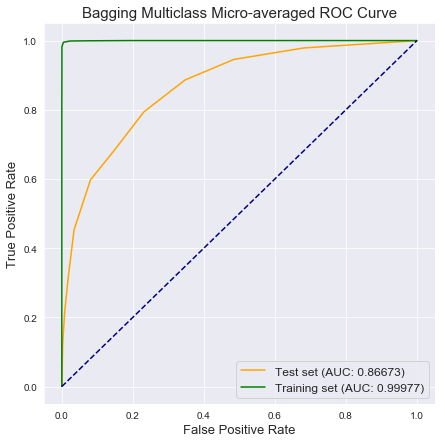

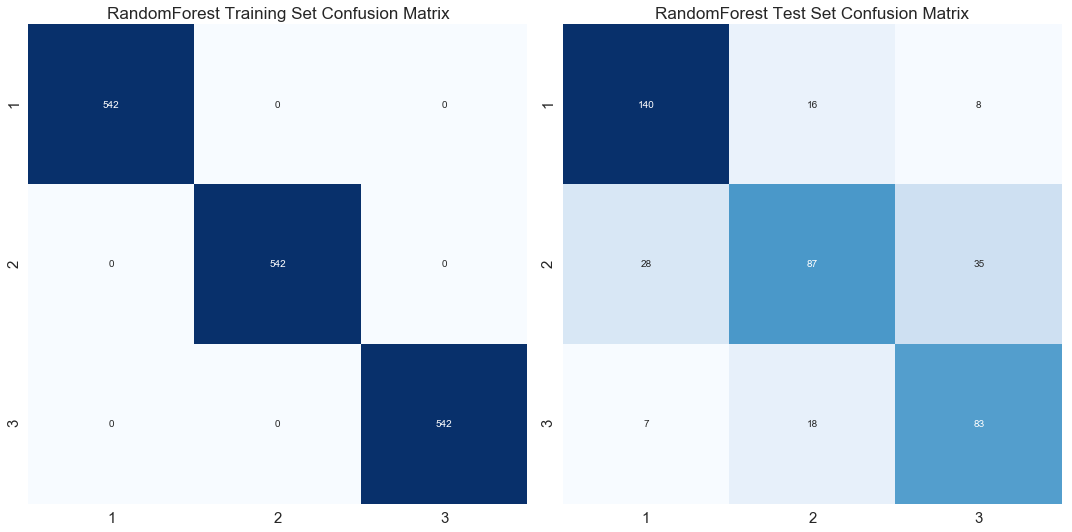

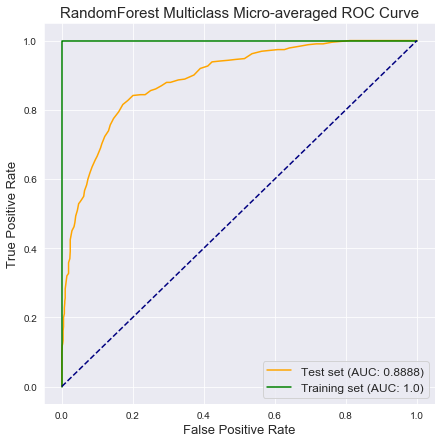

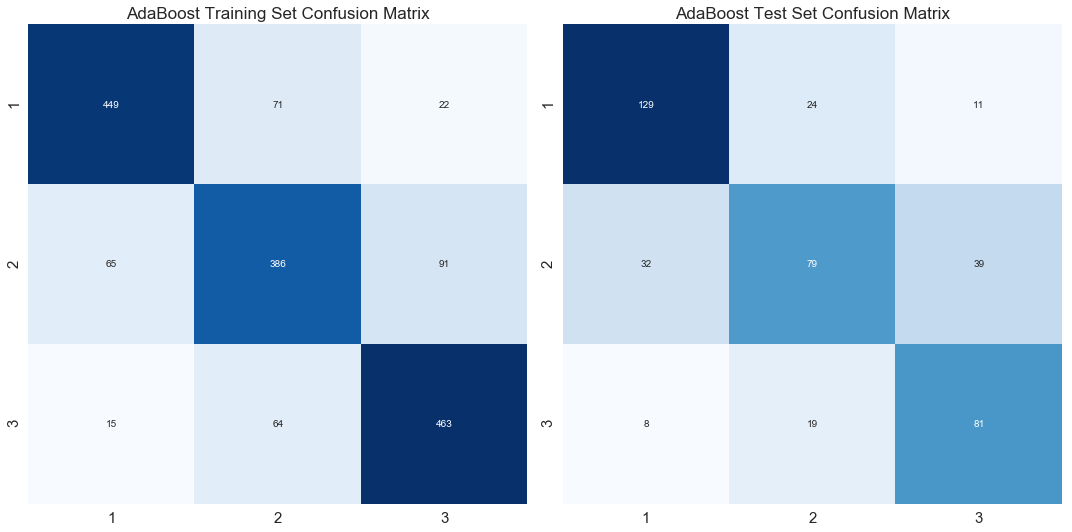

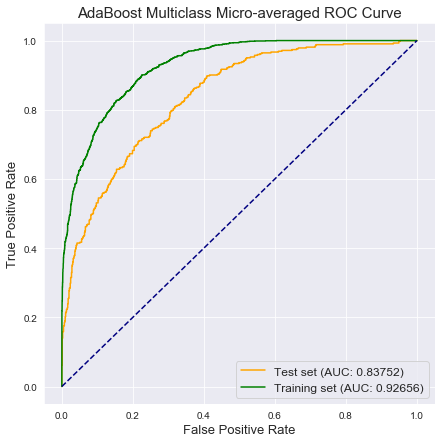

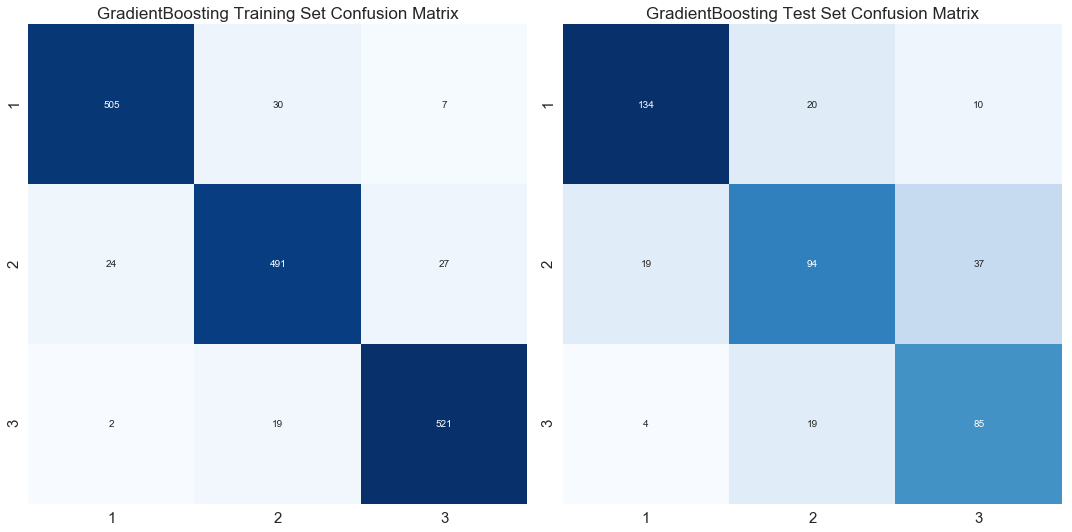

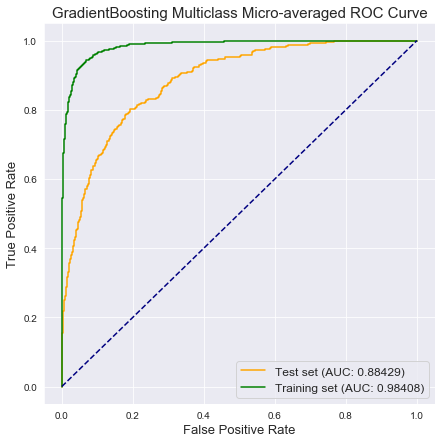

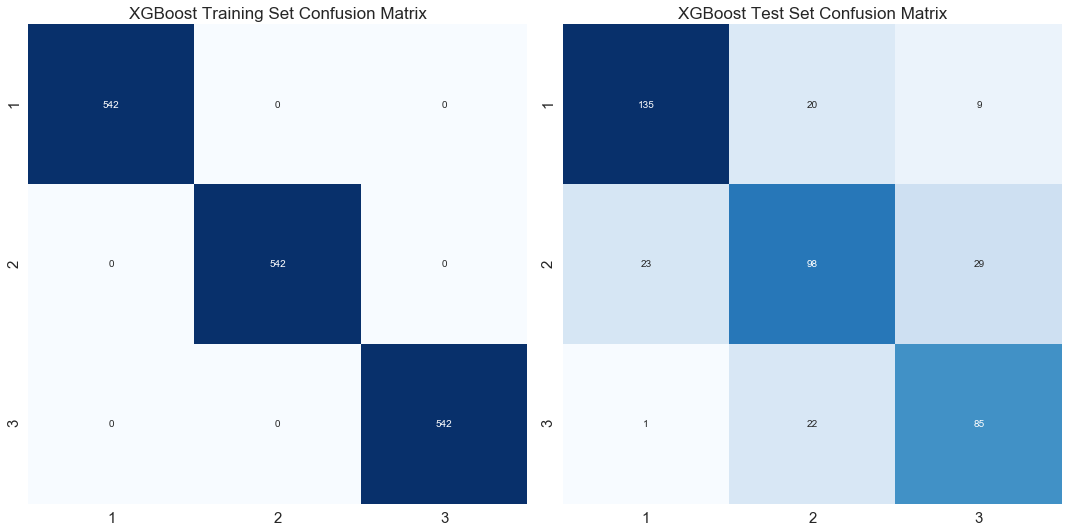

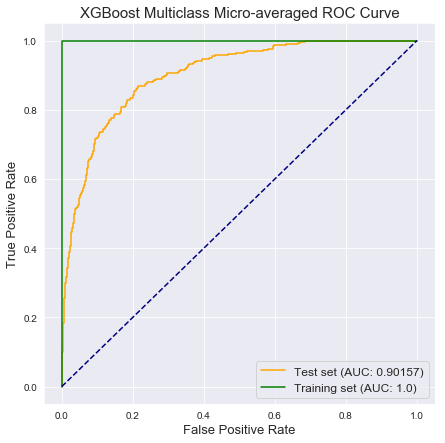

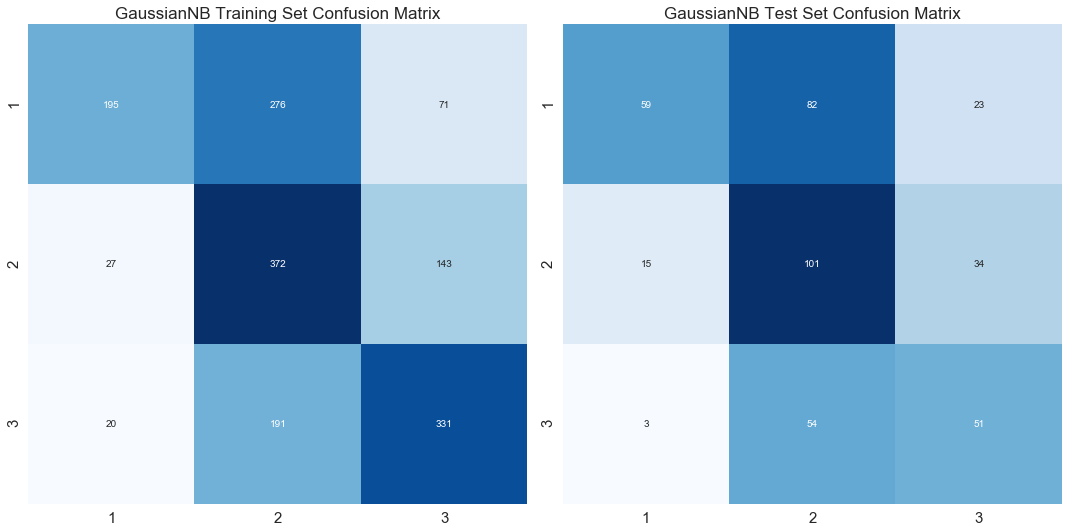

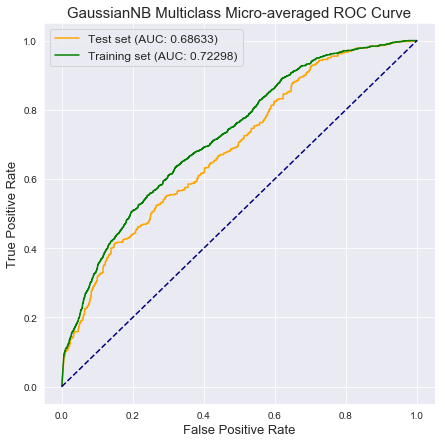

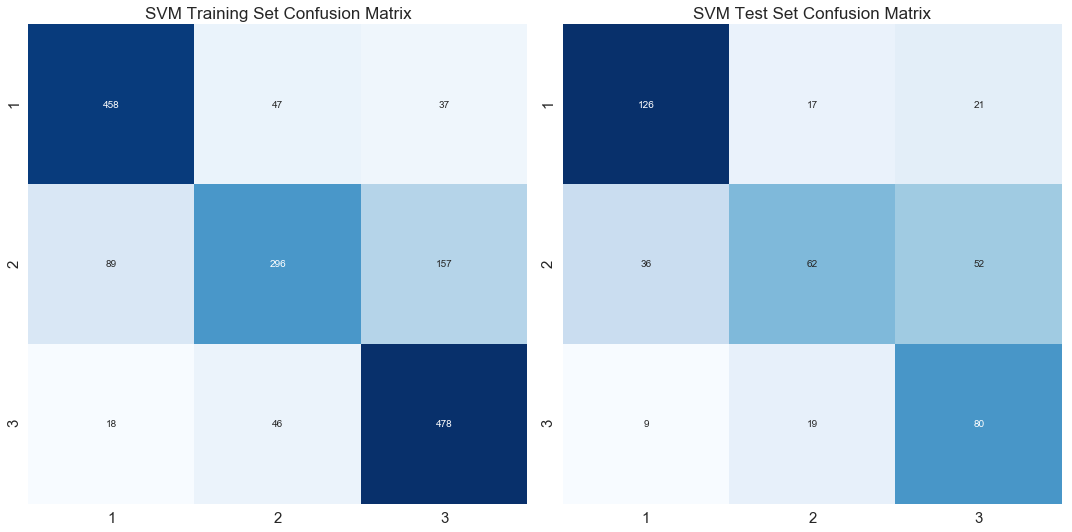

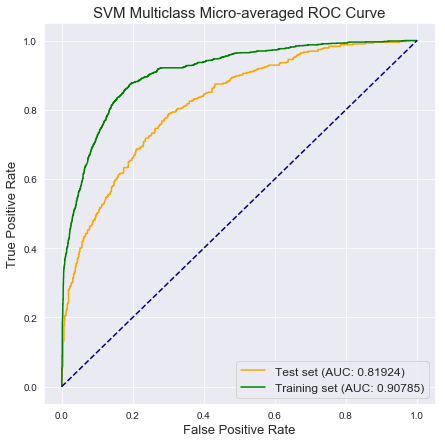


=== Displaying Evaluation Metrics Across All Classifiers for Training Data ===


,precision,recall,accuracy,f1
DummyClassifier,0.111111,0.333333,0.333333,0.166667
LogisticRegression,0.653834,0.658672,0.658672,0.652367
KNN,0.800429,0.781673,0.781673,0.780122
DecisionTree,1.000000,1.000000,1.000000,1.000000
Bagging,0.998155,0.998155,0.998155,0.998154
RandomForest,1.000000,1.000000,1.000000,1.000000
AdaBoost,0.797825,0.798278,0.798278,0.797660
GradientBoosting,0.933011,0.932964,0.932964,0.932909
XGBoost,1.000000,1.000000,1.000000,1.000000
GaussianNB,0.618837,0.552276,0.552276,0.548402


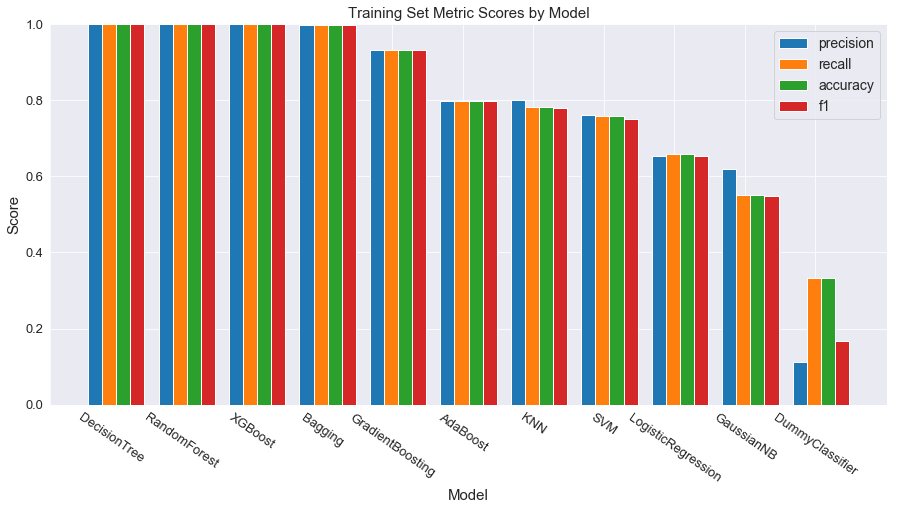


=== Displaying Evaluation Metrics Across All Classifiers for Test Data ===


,precision,recall,accuracy,f1
DummyClassifier,0.065497,0.255924,0.255924,0.104301
LogisticRegression,0.601683,0.604265,0.604265,0.594058
KNN,0.638634,0.592417,0.592417,0.598598
DecisionTree,0.596869,0.549763,0.549763,0.546018
Bagging,0.725688,0.720379,0.720379,0.718144
RandomForest,0.735057,0.734597,0.734597,0.730764
AdaBoost,0.685055,0.684834,0.684834,0.681044
GradientBoosting,0.747713,0.741706,0.741706,0.741869
XGBoost,0.755638,0.753555,0.753555,0.753435
GaussianNB,0.570110,0.500000,0.500000,0.496667


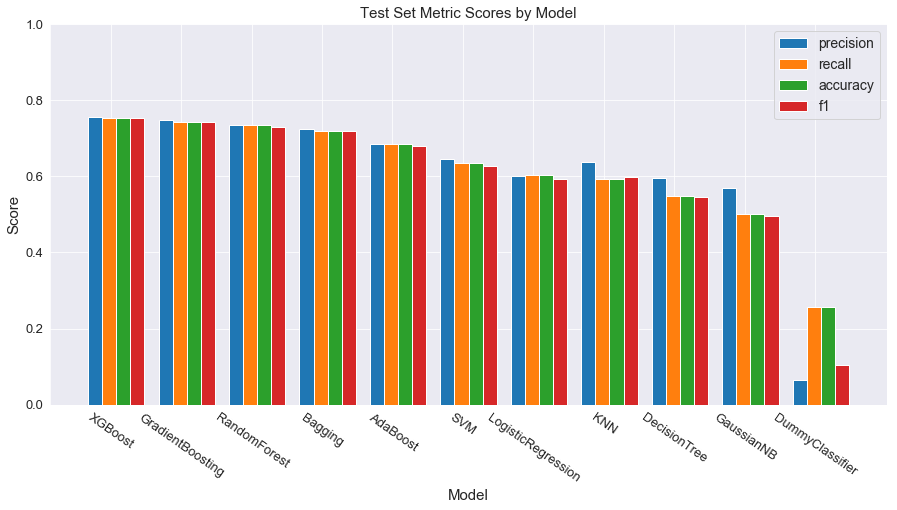

In [4]:
#instantiate Model instance attribute
#some classifiers have static arguments passed into the classifier during instantiation
#these are set in the Model class of the model module
baseline_models = Model(
    X_train, 
    X_test, 
    y_train, 
    y_test
)
#instantiate all classifiers
baseline_models.instantiate_models()
#fit all models and make predictions
baseline_models.fit_all()
#display metrics for each classifier
baseline_models.display_metrics()

The **DummyClassifier** classifier looks at relative proportions of the target classes and makes predictions off of that. This classifier's performance can be used as a benchmark to evaluate performance of other [real] ML algorithms against. 

Now let's go through the performance of each model and decide which models to include in our model stack.

**Logistic Regression** – Good fit between training and set sets. However, AUC and accuracy scores are a bit low. The confusion matrices also portray an overall lackluster performance. We will not be using this model in our model stack. 

**K Nearest Neighbors** – Some overfitting to training data relative to test set. Test set AUC score and accuracy are still okay. This model’s test set performance can possibly be improved with some hyper-parameter tuning. We’ll add this model to our model stack and perform tuning. We'll have to monitor how much value this classifier adds to our model stack, and possibly drop it later on. 

**Decision Tree** – Perfect performance in training data, poor performance in test data, reflecting significant overfitting. We will not include this in our model stack. 

**Bagging (Bootstrap Aggregating)** – Near perfect performance on training set, good performance on test set, signifying some overfitting, but that’s okay since test set performance was good. Unacceptable error is 13/422 = 3.08%, which is pretty good. This model can also possible be improved with some tuning, so we’ll add this to the model stack. 

**Random Forest** – Perfect performance on training set, very good performance on test set. Some overfitting on training set but that’s okay given the good test set performance and low unacceptable error of 15/422 = 3.55%. The baseline model already does very well, but maybe we can improve even further with some parameter tuning. Regardless, we’ll add this to the model stack.

**AdaBoost (Adaptive Boosting)** – Good training set performance, decent test set performance, with relatively lower overfitting. Confusion matrices show mediocre performance with unacceptable error of 19/422 = 4.5%. We’ll add this to the model stack, and try some hyperparameter tuning, but we’ll have to monitor it’s performance in the stack and possibly drop it.

**Gradient Boosting** – Great training set performance, good test set performance. Some overfitting present, but given test set AUC is good, we’ll accept it for now. Confusion matrices look good, with unacceptable error at 3.32%. This is another model that can possibly be improved upon with some tuning, so we’ll add it to the stack. 

**XGBoost (Extreme Gradient Boosting)** – Perfect training set performance, very good test set performance. Confusion matrices look good, and unacceptable error is at 2.37%. The baseline model is the highest test set performer in terms of accuracy, clocking in a 75.36% accuracy. We’ll include this in the model stack, and try out some tuning as well and see if we get even better results. 

**Gaussian Naïve-Bayes** – Poor performance overall. We will not include this in model stack.

**Support Vector Machine** – Decent fit between training and test sets. However, mediocre performance overall. Unacceptable error is 7.11%. We will not be including this in the model stack. 


**Selected Models:** 
- KNN 
- Bagging 
- RandomForest
- AdaBoost
- GradientBoosting
- XGBoost

In [53]:
models = ['KNN', 'Bagging', 'RandomForest', 'AdaBoost', 'GradientBoosting', 'XGBoost']

After an extensive iterative process using GridSearchCV to find the best combination of parameters, we find that the below parameter grid performs best. Note that this does not necessarily mean that this grid contains the best parameters possible for this combination of models, it is only the best out of the parameters we've tried. Of course, even more extensive work can be done to uncover even better parameters, and more computational/processing power would help too, but such things would require more time and resources. This project's python package contains solid infrastructure for reproducing and building upon this overall model/project.

In [54]:
param_grid = {    
    'KNN': {
        'weights': ['distance'],
        'leaf_size': [1],
        'n_jobs': [-1]
    },
    'Bagging': {
        'oob_score': [True],
        'n_estimators': [65],
        'n_jobs': [-1]
    },
    'RandomForest': {
        'min_samples_split': [4],
        'min_samples_leaf': [2],
        'n_estimators': [400],
        'criterion': ['entropy'],
        'max_depth': [400]
    },
    'AdaBoost': {
        'n_estimators': [400]
    },
    'GradientBoosting': {
        'n_estimators': [200],
        'max_depth': [30],
        'min_samples_split': [9],
        'min_samples_leaf': [3]
    },
    'XGBoost': {
        'max_depth': [6],
        'min_child_weight': [3],
        'gamma': [0],
        'subsample': [1],
        'n_estimators': [50]
    }
}

Now we will initialize our Model object and run each classifier with the specified parameters and take a look at the output's metrics. 

Instantiating KNN...

Grid Search Params: {
    "weights": [
        "distance"
    ],
    "leaf_size": [
        1
    ],
    "n_jobs": [
        -1
    ]
}

Instantiating Bagging...

Grid Search Params: {
    "oob_score": [
        true
    ],
    "n_estimators": [
        65
    ],
    "n_jobs": [
        -1
    ]
}

Instantiating RandomForest...

Grid Search Params: {
    "min_samples_split": [
        4
    ],
    "min_samples_leaf": [
        2
    ],
    "n_estimators": [
        400
    ],
    "criterion": [
        "entropy"
    ],
    "max_depth": [
        400
    ]
}

Instantiating AdaBoost...

Grid Search Params: {
    "n_estimators": [
        400
    ]
}

Instantiating GradientBoosting...

Grid Search Params: {
    "n_estimators": [
        200
    ],
    "max_depth": [
        30
    ],
    "min_samples_split": [
        9
    ],
    "min_samples_leaf": [
        3
    ]
}

Instantiating XGBoost...

Grid Search Params: {
    "max_depth": [
        6
    ],
    "min_chil

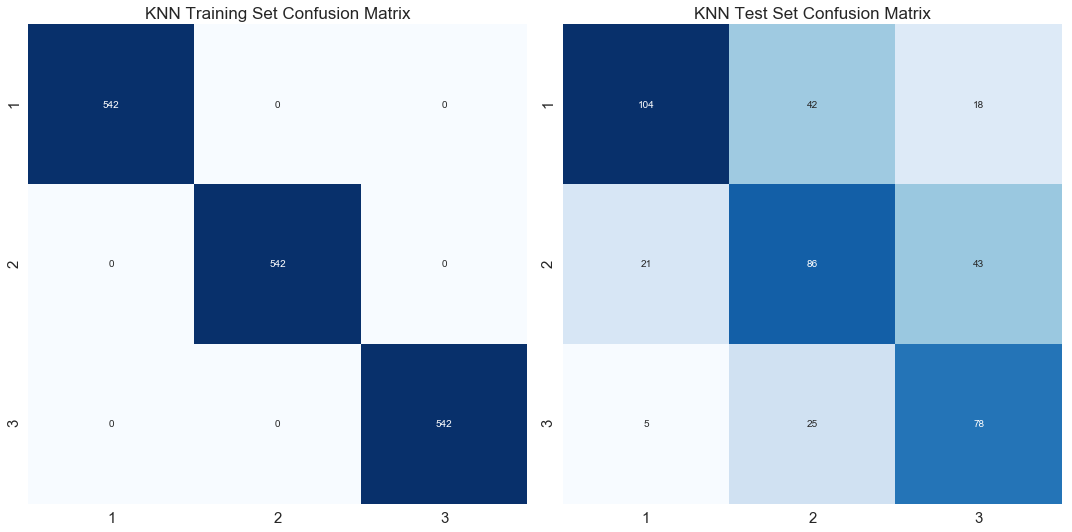

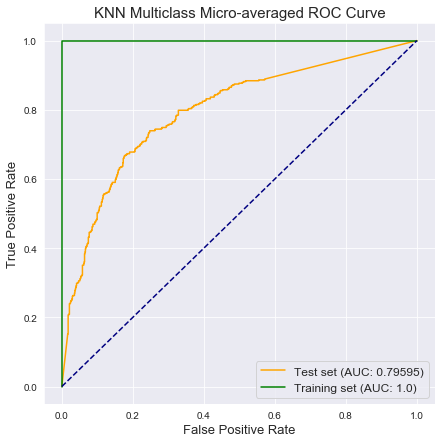

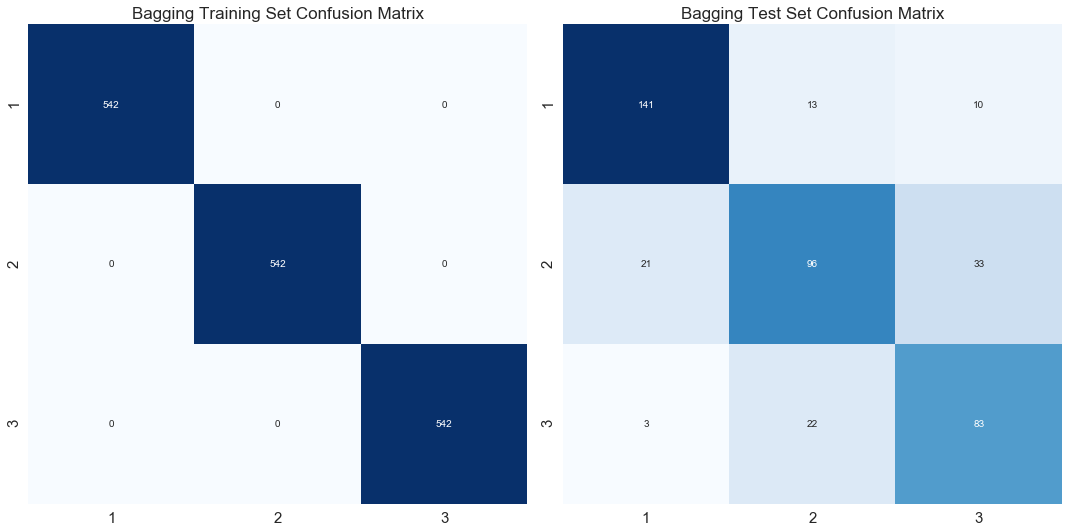

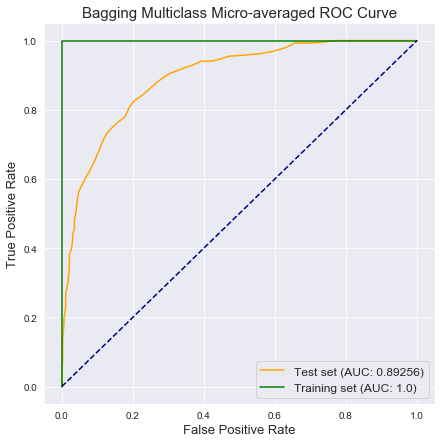

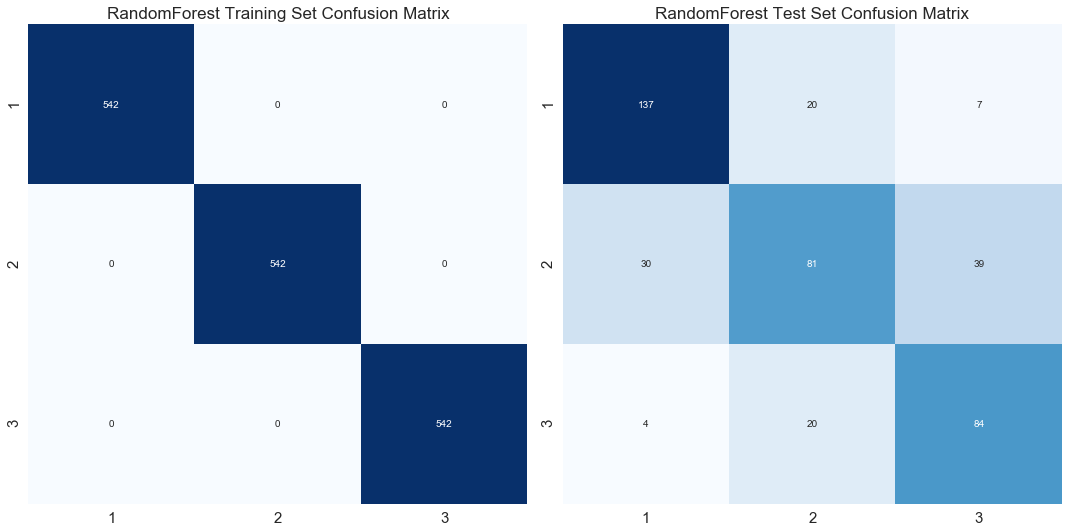

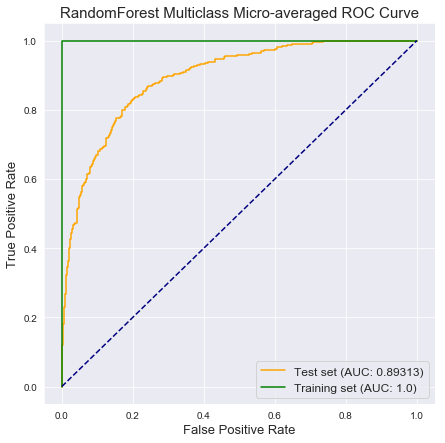

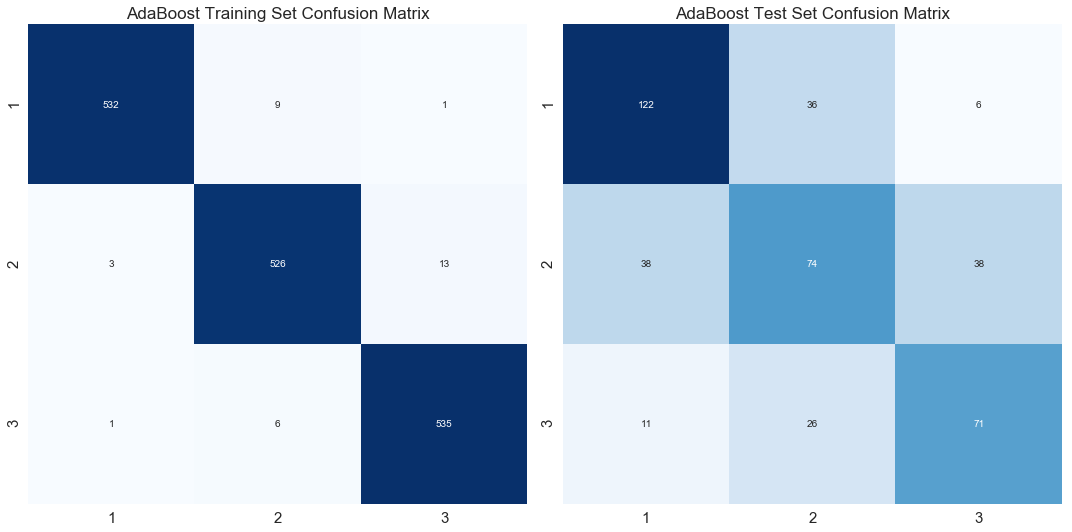

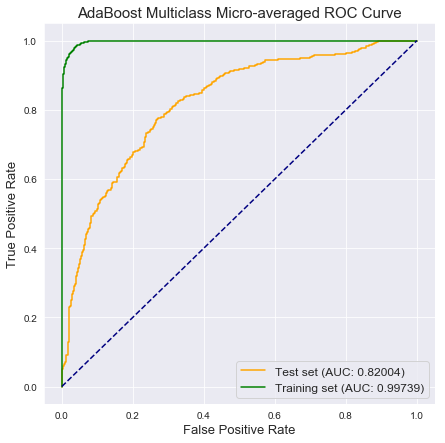

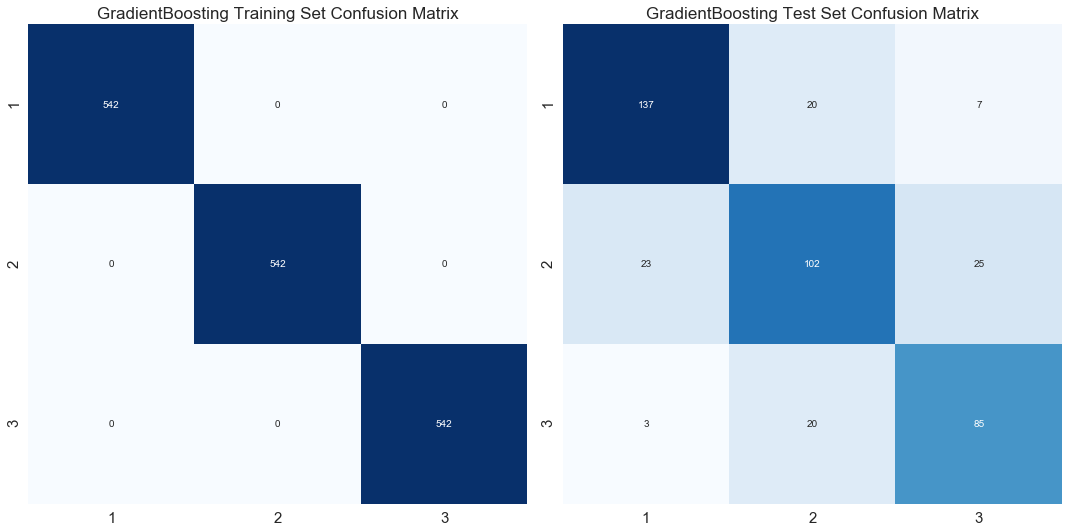

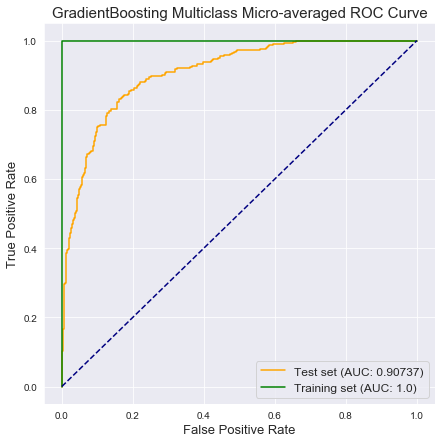

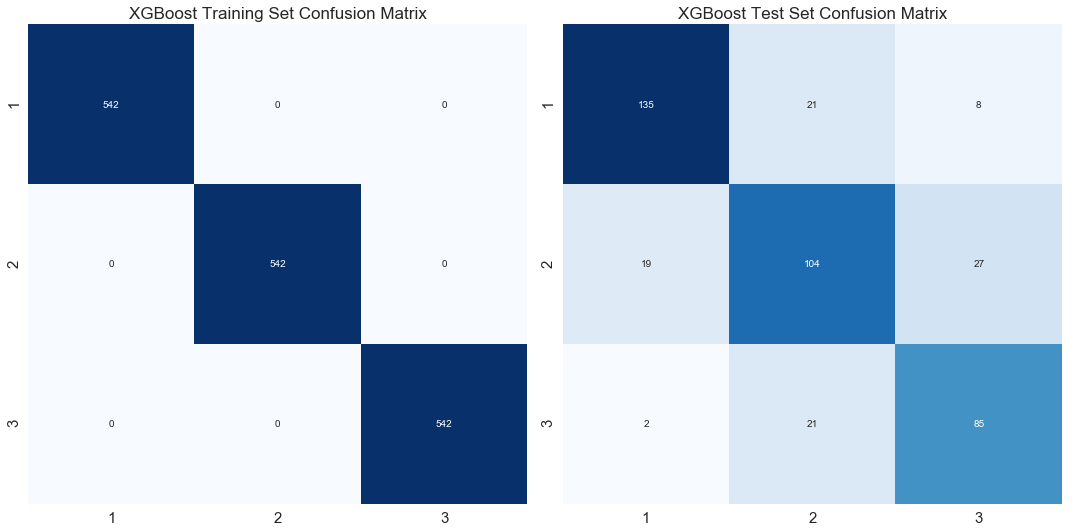

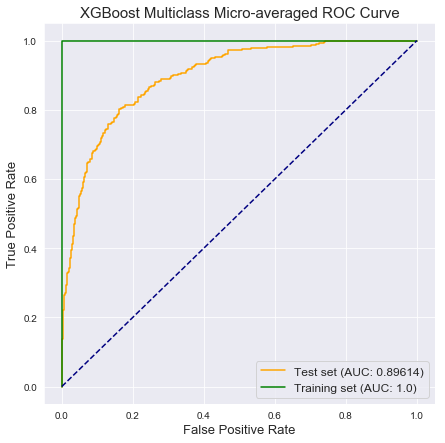


=== Displaying Evaluation Metrics Across All Classifiers for Training Data ===


,precision,recall,accuracy,f1
KNN,1.00000,1.000000,1.000000,1.000000
Bagging,1.00000,1.000000,1.000000,1.000000
RandomForest,1.00000,1.000000,1.000000,1.000000
AdaBoost,0.97977,0.979705,0.979705,0.979713
GradientBoosting,1.00000,1.000000,1.000000,1.000000
XGBoost,1.00000,1.000000,1.000000,1.000000


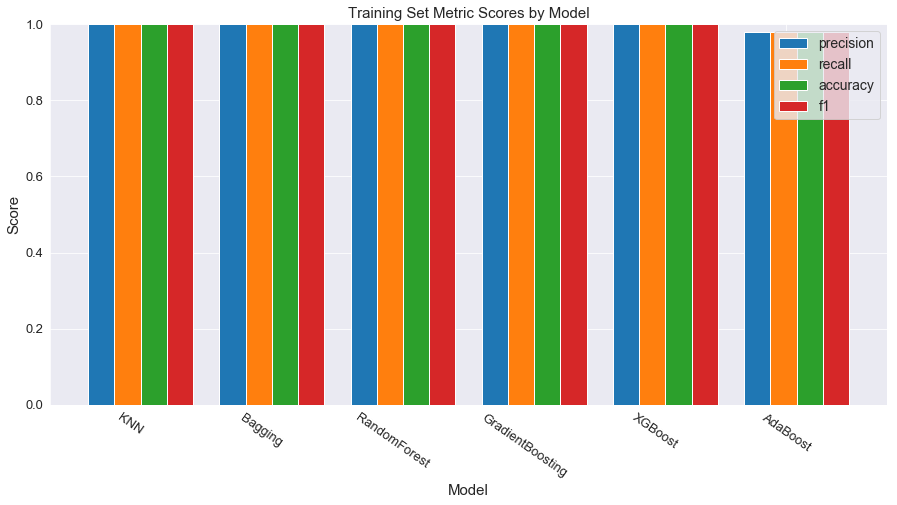


=== Displaying Evaluation Metrics Across All Classifiers for Test Data ===


,precision,recall,accuracy,f1
KNN,0.654308,0.635071,0.635071,0.638356
Bagging,0.761166,0.758294,0.758294,0.757531
RandomForest,0.714667,0.715640,0.715640,0.710996
AdaBoost,0.628677,0.632701,0.632701,0.629963
GradientBoosting,0.767887,0.767773,0.767773,0.767331
XGBoost,0.770788,0.767773,0.767773,0.768499


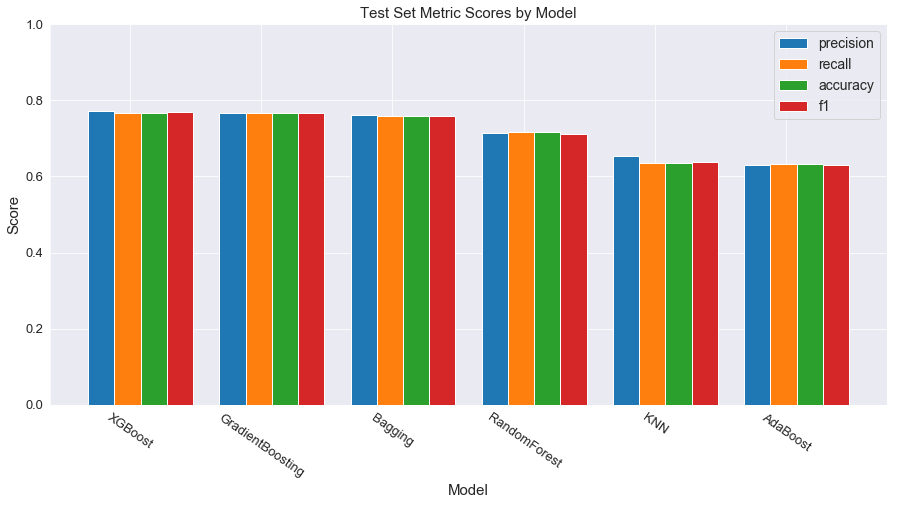

In [55]:
#initialize Model instance object
adjusted_model = Model(
    X_train, 
    X_test, 
    y_train, 
    y_test, 
    gs_param_grid=param_grid,
    cv=5,
    random_state=456
)
#instantiate selected models
adjusted_model.instantiate_models(models=models, display_best_params=False)
#fit all models and make predictions
adjusted_model.fit_all()
#display metrics for each classifier
adjusted_model.display_metrics()

Individually, the models perform quite well with the parameters we have set. There is a bit of overfitting to the training set, as a number of models have perfect performance for those sets, but this isn't too big of a deal now since the test set predictions we're quite good as well. The best performing models in terms of accuracy were the GradientBoosting and XGBoost models, tying at 76.77% accuracy.

Next, let's stack all of our model predictions together and derive weighted predictions, with weights based on each classifiers' score. We hope to see that the model stack performs higher than any individual model. 

**For more transaparency on how the model-stacking is done, you can refer to the docstrings in the Ensemble class of the model module.

=== Initiating model predictions stacking process === 
Base: None 
Method: weighted



'=== Displaying Invididual Classifier Scores ==='

,score
KNN,0.635071
Bagging,0.758294
RandomForest,0.715640
AdaBoost,0.632701
GradientBoosting,0.767773
XGBoost,0.767773



======================================== ** NOTE ** ======================================== 
The GradientBoosting classifier predictions alone are better than the stacked predictions 
Recommend taking the predictions of solely the GradientBoosting classifier 

Best Individual Classifier Score: 0.7677725118483413

Stacked Score: 0.7654028436018957

Baseline Accuracy: 0.3886255924170616

Random Guessing Accuracy: 0.3333333333333333


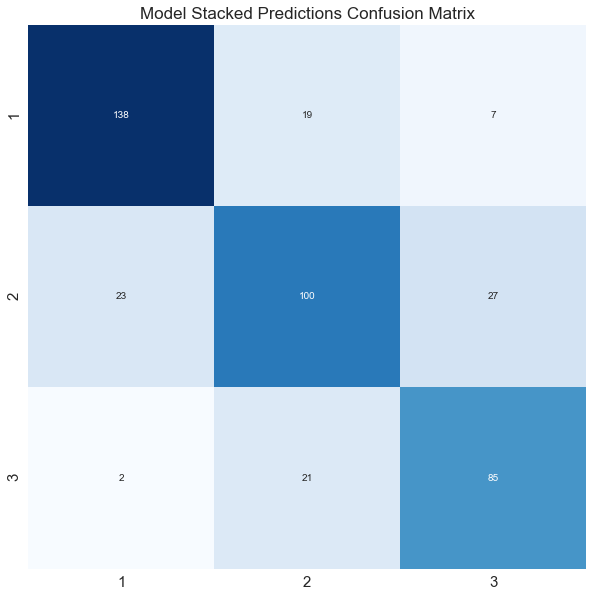

In [80]:
y_pred_dict = {
    clf_name: preds['Test'] 
    for clf_name, preds in adjusted_model.y_pred_dict.items()
}
final_preds = Ensemble.stack_models(y_pred_dict, y_test)

Looks like our stacked model did very well. However, the stacked model performance did not beat the individual performances of the GradientBoosting (and XGBoost) classifiers. After some trial and error, we find that removing KNN and AdaBoost from the model stack increases performance. Let's do that below and rerun the ensemble process.

=== Initiating model predictions stacking process === 
Base: None 
Method: weighted



'=== Displaying Invididual Classifier Scores ==='

,score
Bagging,0.758294
RandomForest,0.715640
GradientBoosting,0.767773
XGBoost,0.767773



Stacked Score: 0.7725118483412322

Baseline Accuracy: 0.3886255924170616

Random Guessing Accuracy: 0.3333333333333333


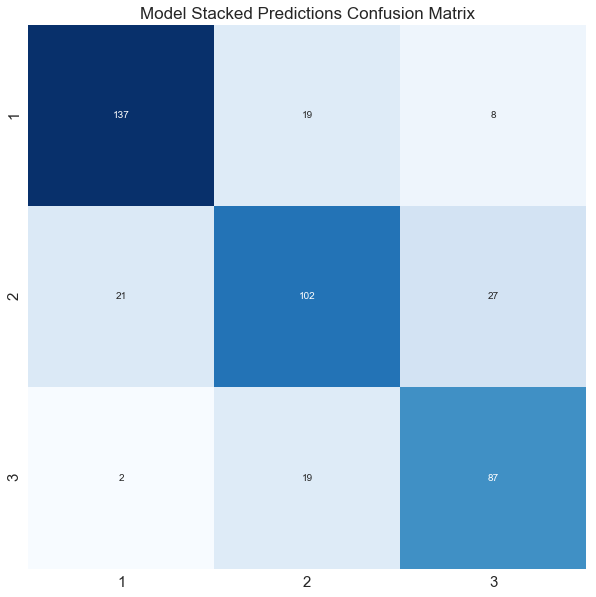

In [83]:
y_pred_dict = {k: v for k, v in y_pred_dict.items() if k not in ['KNN', 'AdaBoost']}
final_preds = Ensemble.stack_models(y_pred_dict, y_test)

Great! Now our stacked score is better than any individual classifier, so our model stack indeed yields higher performance. 

Now that we have the best score, let's analyze some of the other information the method output displays to us. 

Starting with the "Baseline Accuracy" benchmark. This figure is what the accuracy of the model would be if it were to predict the class that shows up most in the target variable test set, for every single data point. For example, if we have 100 test set elements, and the value counts of the set are 40-"low", 30-"medium", 30-"high". The baseline accuracy of the model would be the (count of the mode)/(number of elements in the entire set) = 40/100 = 40%. Baseline accuracy also makes any class imbalances in the target test set more apparent. In our case, the baseline accuracy is 38.86%, which means our algo improved accuracy by +38.39%!

The "Random Guessing Accuracy" benchmark is simply the probabilty of getting a prediction correct by random guessing. This equates to 1/(number of classes) = 1/3 = 33.33% for our set, which means that our model is +43.92% more accurate than random guessing. 

Lastly, our confusion matrix displays the correct and incorrect class predictions. Overall, it looks good. Let's take another look at the metric we discussed earlier, the "unacceptable error". The error here is (8 + 2)/422 = 10/422 = 2.37%, which is very good!

**All in all, this model performs fairly well in predicting the credit risk of a company given the relevant predictor variable data. However, when a company's data suggests that it's credit risk lies somewhere on the border between classes, as in low/medium risk, or medium/high risk, there is a higher chance of an incorrect prediction. In a real business case scenario, the designation should be taken with a grain of salt, and perhaps adding other processes on top of this model will yield more refined results. The good news is that this model will rarely predict a class that is on the other end of the spectrum from the actual class, which could have led to greater business risk depending on the use of this model.**

Again, this model can be improved in the future with more extensive time and resources inputted into hyperparameter tuning, model stacking combinations (including base model combinations for stacking), perhaps even preprocessing, etc. Also, more data would be very beneficial too, and if the additional data is large enough perhaps we'd be able to add more granularity in the target classes, where we have more classes that are more specific.